In [1]:
from skimage import data
import numpy as np
import matplotlib.pyplot as plt

In [52]:
#https://towardsdatascience.com/image-segmentation-using-pythons-scikit-image-module-533a61ecc980

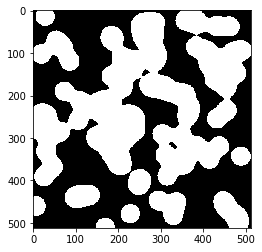

In [2]:
image = data.binary_blobs()
plt.imshow(image, cmap='gray')

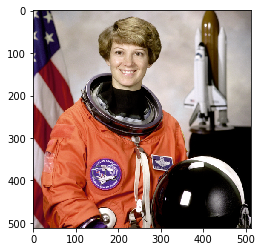

In [3]:
image = data.astronaut()
plt.imshow(image)

In [20]:
from skimage import io
import cv2

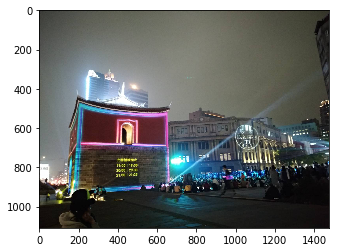

In [21]:
image = io.imread('Building.jpg')

plt.imshow(image)

In [22]:
images = io.ImageCollection('Cat.jpg')

In [23]:
print('Type:', type(images))

Type: <class 'skimage.io.collection.ImageCollection'>


In [25]:
io.imsave('Building.png', image)

# Basic Imports

In [41]:
import numpy as np
import matplotlib.pyplot as plt

import skimage.data as data
import skimage.segmentation as seg
import skimage.draw as draw
import skimage.color as color
import skimage.filters as filters

In [43]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d1d808c9e8>)

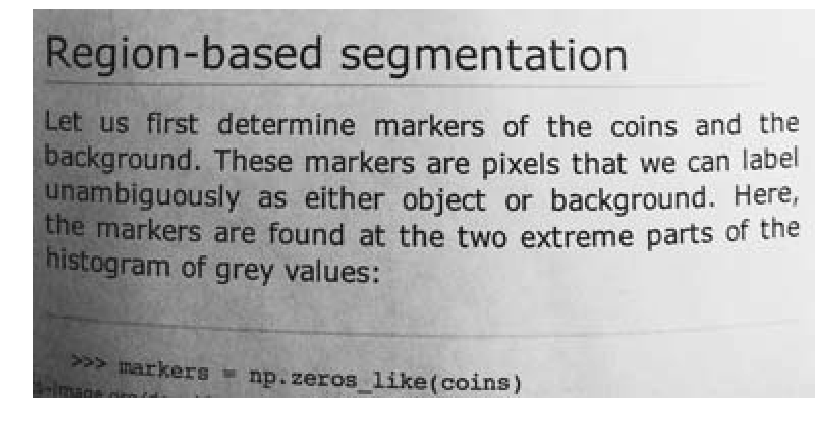

In [44]:
text = data.page()
image_show(text)

(0, 256)

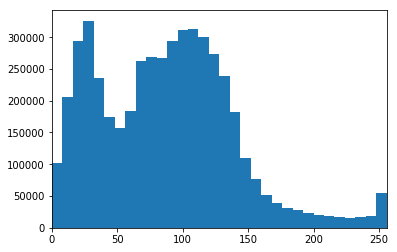

In [45]:
fig, ax = plt.subplots(1, 1)
ax.hist(image.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d1d817d588>)

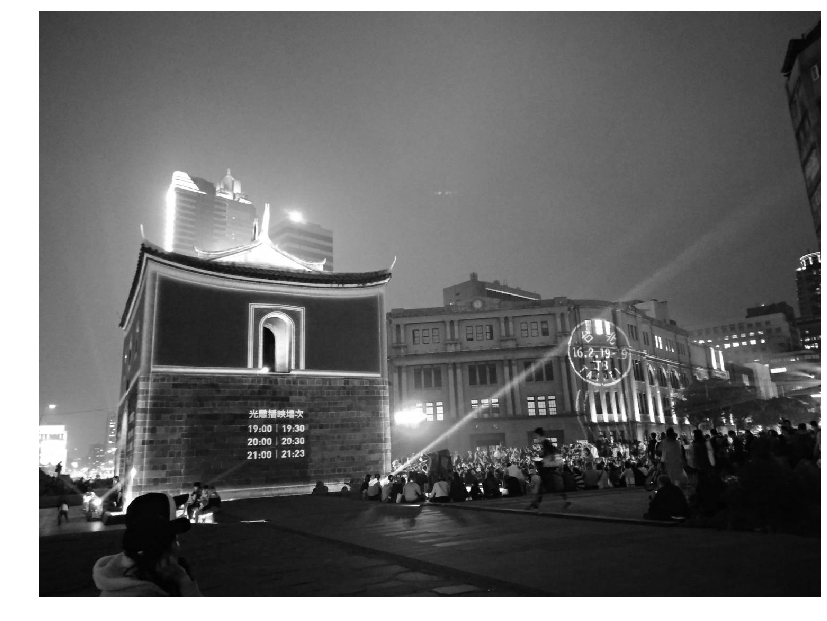

In [47]:
image_gray = color.rgb2gray(image)
image_show(image_gray)

# Active contour segmentation

In [48]:
def circle_points(resolution, center, radius):
    
    radians = np.linspace(0, 2*np.pi, resolution)
    
    c = center[1] + radius*np.cos(radians)
    r = center[0] + radius*np.sin(radians)
    
    return np.array([c, r]).T

points = circle_points(200, [80, 250], 80)[:-1]

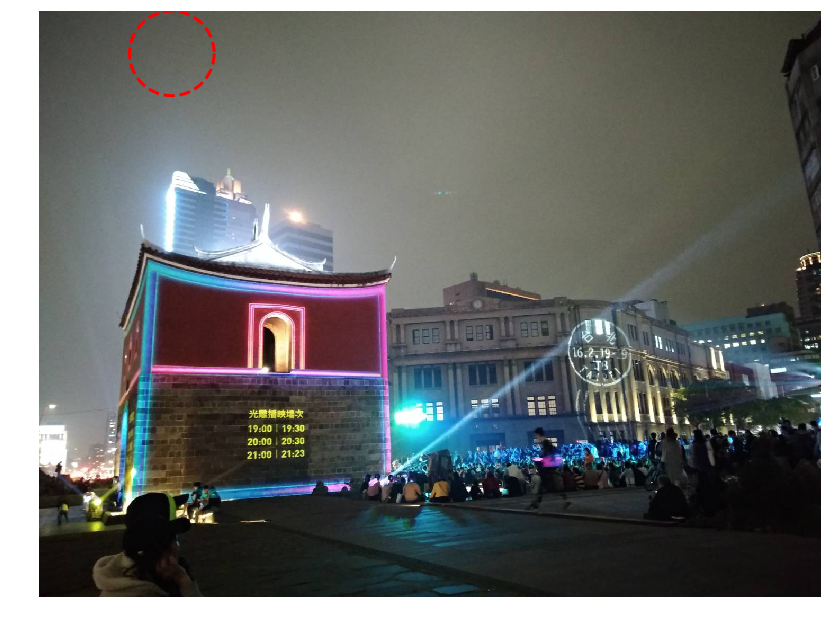

In [49]:
fig, ax = image_show(image)
ax.plot(points[:, 0], points[:, 1 ], '--r', lw=3)

# SLIC(Simple Linear Iterative Clustering)

In [50]:
image_slic = seg.slic(image, n_segments=155)

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d1d84b1f28>)

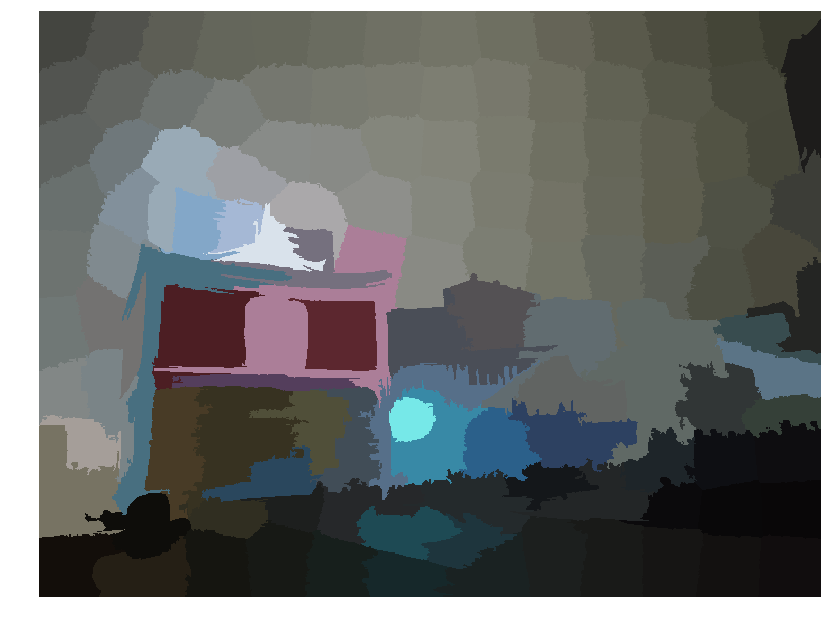

In [51]:
image_show(color.label2rgb(image_slic, image, kind='avg'))

# Felzenswalb

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d1d8bc9550>)

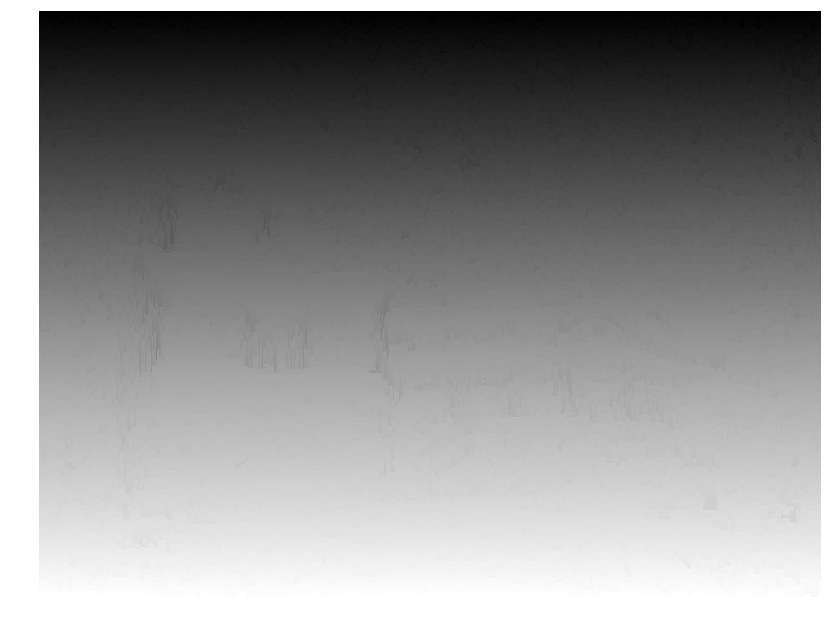

In [53]:
image_felzenszwalb = seg.felzenszwalb(image)
image_show(image_felzenszwalb)

In [54]:
np.unique(image_felzenszwalb).size

24806

(<Figure size 1008x1008 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1d181289dd8>)

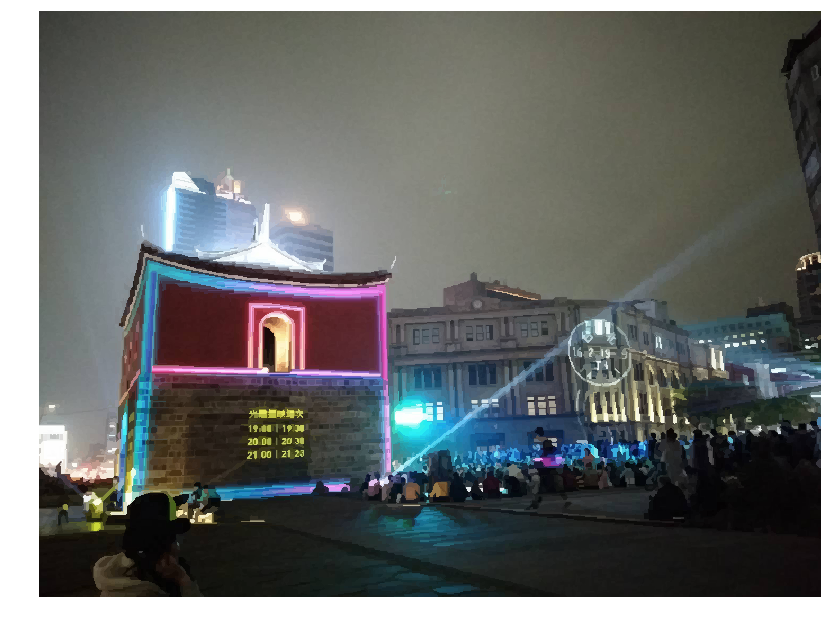

In [55]:
image_felzenszwalb_colored = color.label2rgb(image_felzenszwalb, image, kind='avg')
image_show(image_felzenszwalb_colored)